<a href="https://colab.research.google.com/github/samyukthagopalsamy/DataVisualization/blob/main/DataVisualizationUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Using Python

### Python is a powerful language for data visualization. 

* Choose a dataset
* Install necessary libraries. Two popular libraries for data visualization in Python are Matplotlib and Seaborn. You can install them using the following commands:

      ```
      pip install matplotlib
      pip install seaborn
      ```
* Import your data
* Create your visualizations 
* Customize your visualizations




In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizations tools
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset 
The Ames Housing Price Prediction dataset is a popular dataset used for regression tasks, particularly for predicting housing prices. The dataset contains information about houses in Ames, Iowa, USA, including features such as the house's age, size, location, and various other characteristics.

In [2]:
url = 'https://raw.githubusercontent.com/samyukthagopalsamy/DataVisualization/main/dataset.csv'
dataset = pd.read_csv(url)

In [3]:
print("The dataset has", dataset.shape[1], "variables describing", dataset.shape[0], "property sales in locations within Ames city limits")

The dataset has 81 variables describing 1460 property sales in locations within Ames city limits


We can see all the columns in the dataset and get a quick glance at null values and the data types (e.g. float, int, object) for our features using the DataFrame info() method

In [4]:
dataset.info() # concise summary of our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The variables are a mix of 43 **categorical** (nominal and ordinal), **continuous**(basement, main living area measurements) and discrete types(like number of kitchens, bedrooms, and bathrooms).

Some variables like PoolQC, Alley and MiscFeature have a lot of null(missing) values.

There is a memory usage of 924 KB for the entire dataset.

In [5]:
print("The dataset includes property sales occurred between", dataset['YrSold'].min(), "and", dataset['YrSold'].max())

The dataset includes property sales occurred between 2006 and 2010


In [6]:
print("Median Sales Price of the houses is $",int(dataset.SalePrice.median()))
print("Average(mean) Sales Price of the houses is $",int(dataset.SalePrice.mean()))

Median Sales Price of the houses is $ 163000
Average(mean) Sales Price of the houses is $ 180921


In [7]:
dataset.drop('Id', axis = 1, inplace = True) #dropping Id column, it's unnecessary for  the analysis and prediction (Id has unique values)

In [8]:
dataset.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1093,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
1006,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,163500
901,20,RL,64.0,8712,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,153000


It contains data of almost every characteristic of different houses that were sold Ames, Iowa.
There are 80 variables(excluding Index Id) that are directly related to property sales.

These variables describe the physical attributes of a property, like



1.   When was the property built, renovated?
2.   Which month, year was the property sold?
3.   How big is the basement, garage, living area?
4.   How many bedrooms, bathrooms are there?

In [9]:
# function to describe the field dtype, missing and unique values
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Sample Value 1'] = df.iloc[0].values
    summary['Sample Value 2'] = df.iloc[1].values
    return summary

description(dataset)

,Name,dtypes,Missing,Uniques,Sample Value 1,Sample Value 2
0,MSSubClass,int64,0,15,60,20
1,MSZoning,object,0,5,RL,RL
2,LotFrontage,float64,259,110,65.0,80.0
3,LotArea,int64,0,1073,8450,9600
4,Street,object,0,2,Pave,Pave
...,...,...,...,...,...,...
75,MoSold,int64,0,12,2,5
76,YrSold,int64,0,5,2008,2007
77,SaleType,object,0,9,WD,WD
78,SaleCondition,object,0,6,Normal,Normal


### Common types of visualizations

**Line Chart:** A line chart is used to show trends over time or across categories. It is often used to display changes in a variable over a continuous time period.

**Bar Chart:** A bar chart is used to compare different categories. It is often used to show the frequency or count of different categories.

**Histogram:** A histogram is used to display the distribution of a continuous variable. It shows the number of observations that fall into each bin or interval.

**Scatter Plot:** A scatter plot is used to display the relationship between two continuous variables. It is often used to identify patterns or relationships between variables.

**Heatmap:** A heatmap is used to show the magnitude of a variable in a two-dimensional space. It is often used to visualize correlations between variables.

**Box Plot:** A box plot is used to display the distribution of a continuous variable. It shows the median, quartiles, and outliers of the variable.

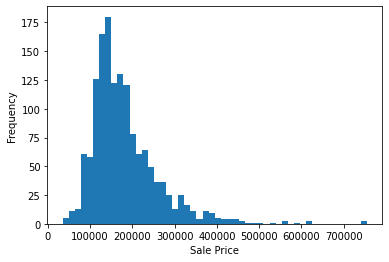

In [10]:
# Create a histogram of SalePrice
plt.hist(dataset['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

### Heatmap of correlation between features

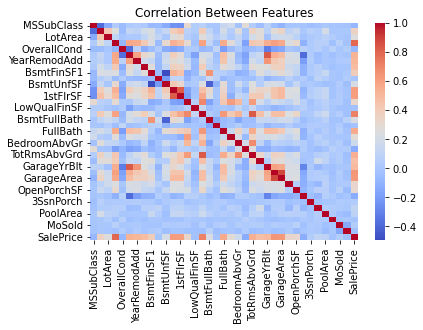

In [11]:
# Create a heatmap of correlation between features
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

### Scatter plot of GrLivArea vs. SalePrice

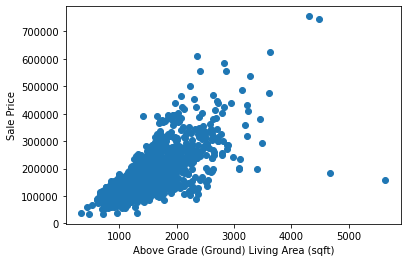

In [12]:
# Create a scatter plot of GrLivArea vs. SalePrice
plt.scatter(dataset['GrLivArea'], dataset['SalePrice'])
plt.xlabel('Above Grade (Ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

### Box plot of OverallQual vs. SalePrice

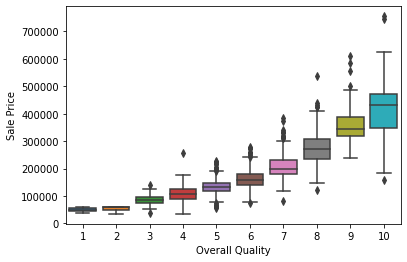

In [13]:
# Create a box plot of OverallQual vs. SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=dataset)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

## Handling missing values in the dataset

**Visualizing missing data**

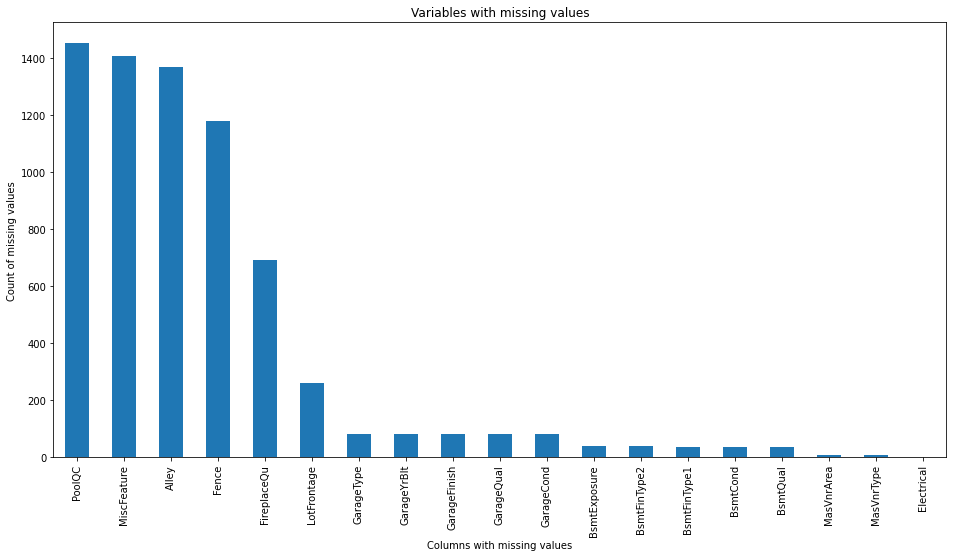

In [14]:
def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True, ascending=False)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(16,8))
    plt.title('Variables with missing values')
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count of missing values')
    
plot_missing(dataset)

### Analyzing influence of missing categoricals on SalePrice
Plotting columns with missing categorical variables against SalePrice to see how these features influence the Sale Price of a house/property.

Using **seaborn**, a Python library that is built on top of matplotlib and has support for NumPy and pandas

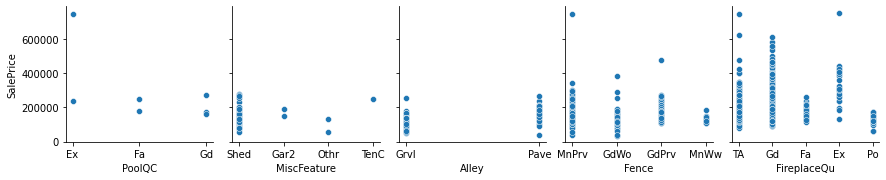

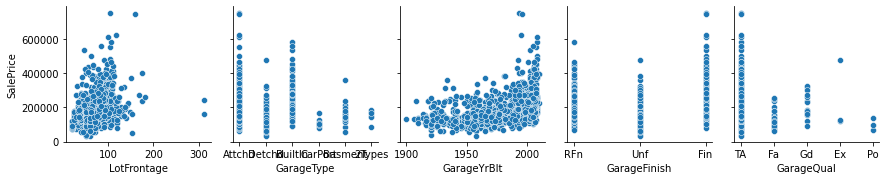

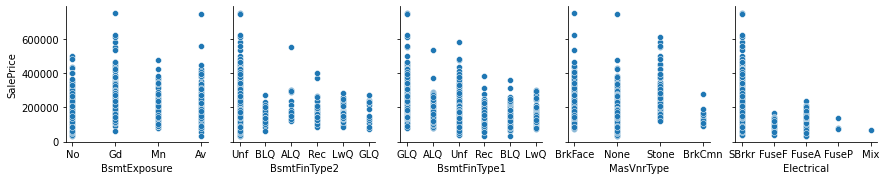

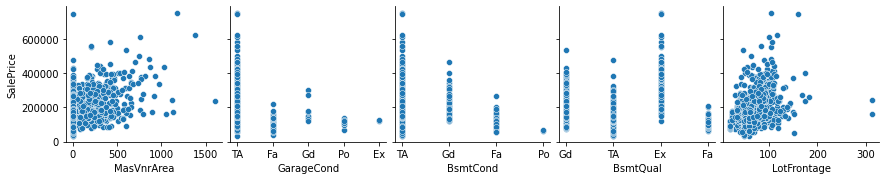

In [15]:
sns.pairplot(x_vars = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], y_vars = 'SalePrice', data = dataset)
plt.show()
sns.pairplot(x_vars = ['LotFrontage','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual'],  y_vars = 'SalePrice', data = dataset)
plt.show()
sns.pairplot(x_vars = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'Electrical'], y_vars = 'SalePrice', data = dataset)
plt.show()
sns.pairplot(x_vars = ['MasVnrArea', 'GarageCond', 'BsmtCond', 'BsmtQual', 'LotFrontage'], y_vars = 'SalePrice', data = dataset)
plt.show()

Features such as PoolQC, MiscFeature, Alley and Fence are missing in most houses (>95%)
Also, features such as BsmtExposure, BsmtFinType2, BsmtFinType1, and MasVnrType don't seem to influence the saleprice

# Dropping unnecessary categorical columns

In [16]:
dataset.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish'], axis = 1, inplace = True)

In [17]:
print(len(dataset.loc[dataset['PoolArea'] == 0]), "properties don't have pool as indicated by 0 sqft. pool area")
print(len(dataset.loc[dataset['Fireplaces'] == 0]), "properties don't have a fireplace")
print(len(dataset.loc[dataset['GarageCars'] == 0]), "properties don't have a garage as indicated by zero car capacity")
print(len(dataset.loc[dataset['TotalBsmtSF'] == 0]), "properties don't have a basement as indicated by 0 sqft. basement area")

1453 properties don't have pool as indicated by 0 sqft. pool area
690 properties don't have a fireplace
81 properties don't have a garage as indicated by zero car capacity
37 properties don't have a basement as indicated by 0 sqft. basement area


## Imputation with mean and NA

In [18]:
garage_cols = ['GarageQual','GarageCond']
dataset[garage_cols] = dataset[garage_cols].fillna('NA') # imputing missing garage values with NA (No Garage)

basement_cols = ['BsmtQual', 'BsmtCond']
dataset[basement_cols] = dataset[basement_cols].fillna('NA') #imputing missing basement values with NA (No Basement)

# since only one property has missing Electrical value, hence imputing the most common Electrical system
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

dataset['MasVnrArea'].fillna(0, inplace = True)
dataset['LotFrontage'].fillna(0, inplace = True)

In [19]:
print("The total number of missing values after imputation/dropping columns is", dataset.isnull().sum().sum())

The total number of missing values after imputation/dropping columns is 0


In [20]:
dataset.isnull() # after handling all null values by imputation or dropping columns, there is no missing values/fields

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
dataset.describe(include ="all") #descriptive statistics of the DataFrame columns.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,4,4,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,1382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,57.623288,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,34.664304,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,42.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,63.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Understanding the dataset

In [22]:
categorical = [col for col in dataset.columns if dataset.dtypes[col] =='object']
numericals  = [col for col in dataset.columns if dataset.dtypes[col] !='object']

In order to visualize all the categorical variables in the dataset, we loop through pandas series to create subplots.

Using plt.subplots, to create a figure with a grid of 6 rows and columns. Then iterating over every categorical variable to create a countplot with seaborn.

### Countplots for each of the categorical variables

In [23]:
import warnings
warnings.filterwarnings("ignore")

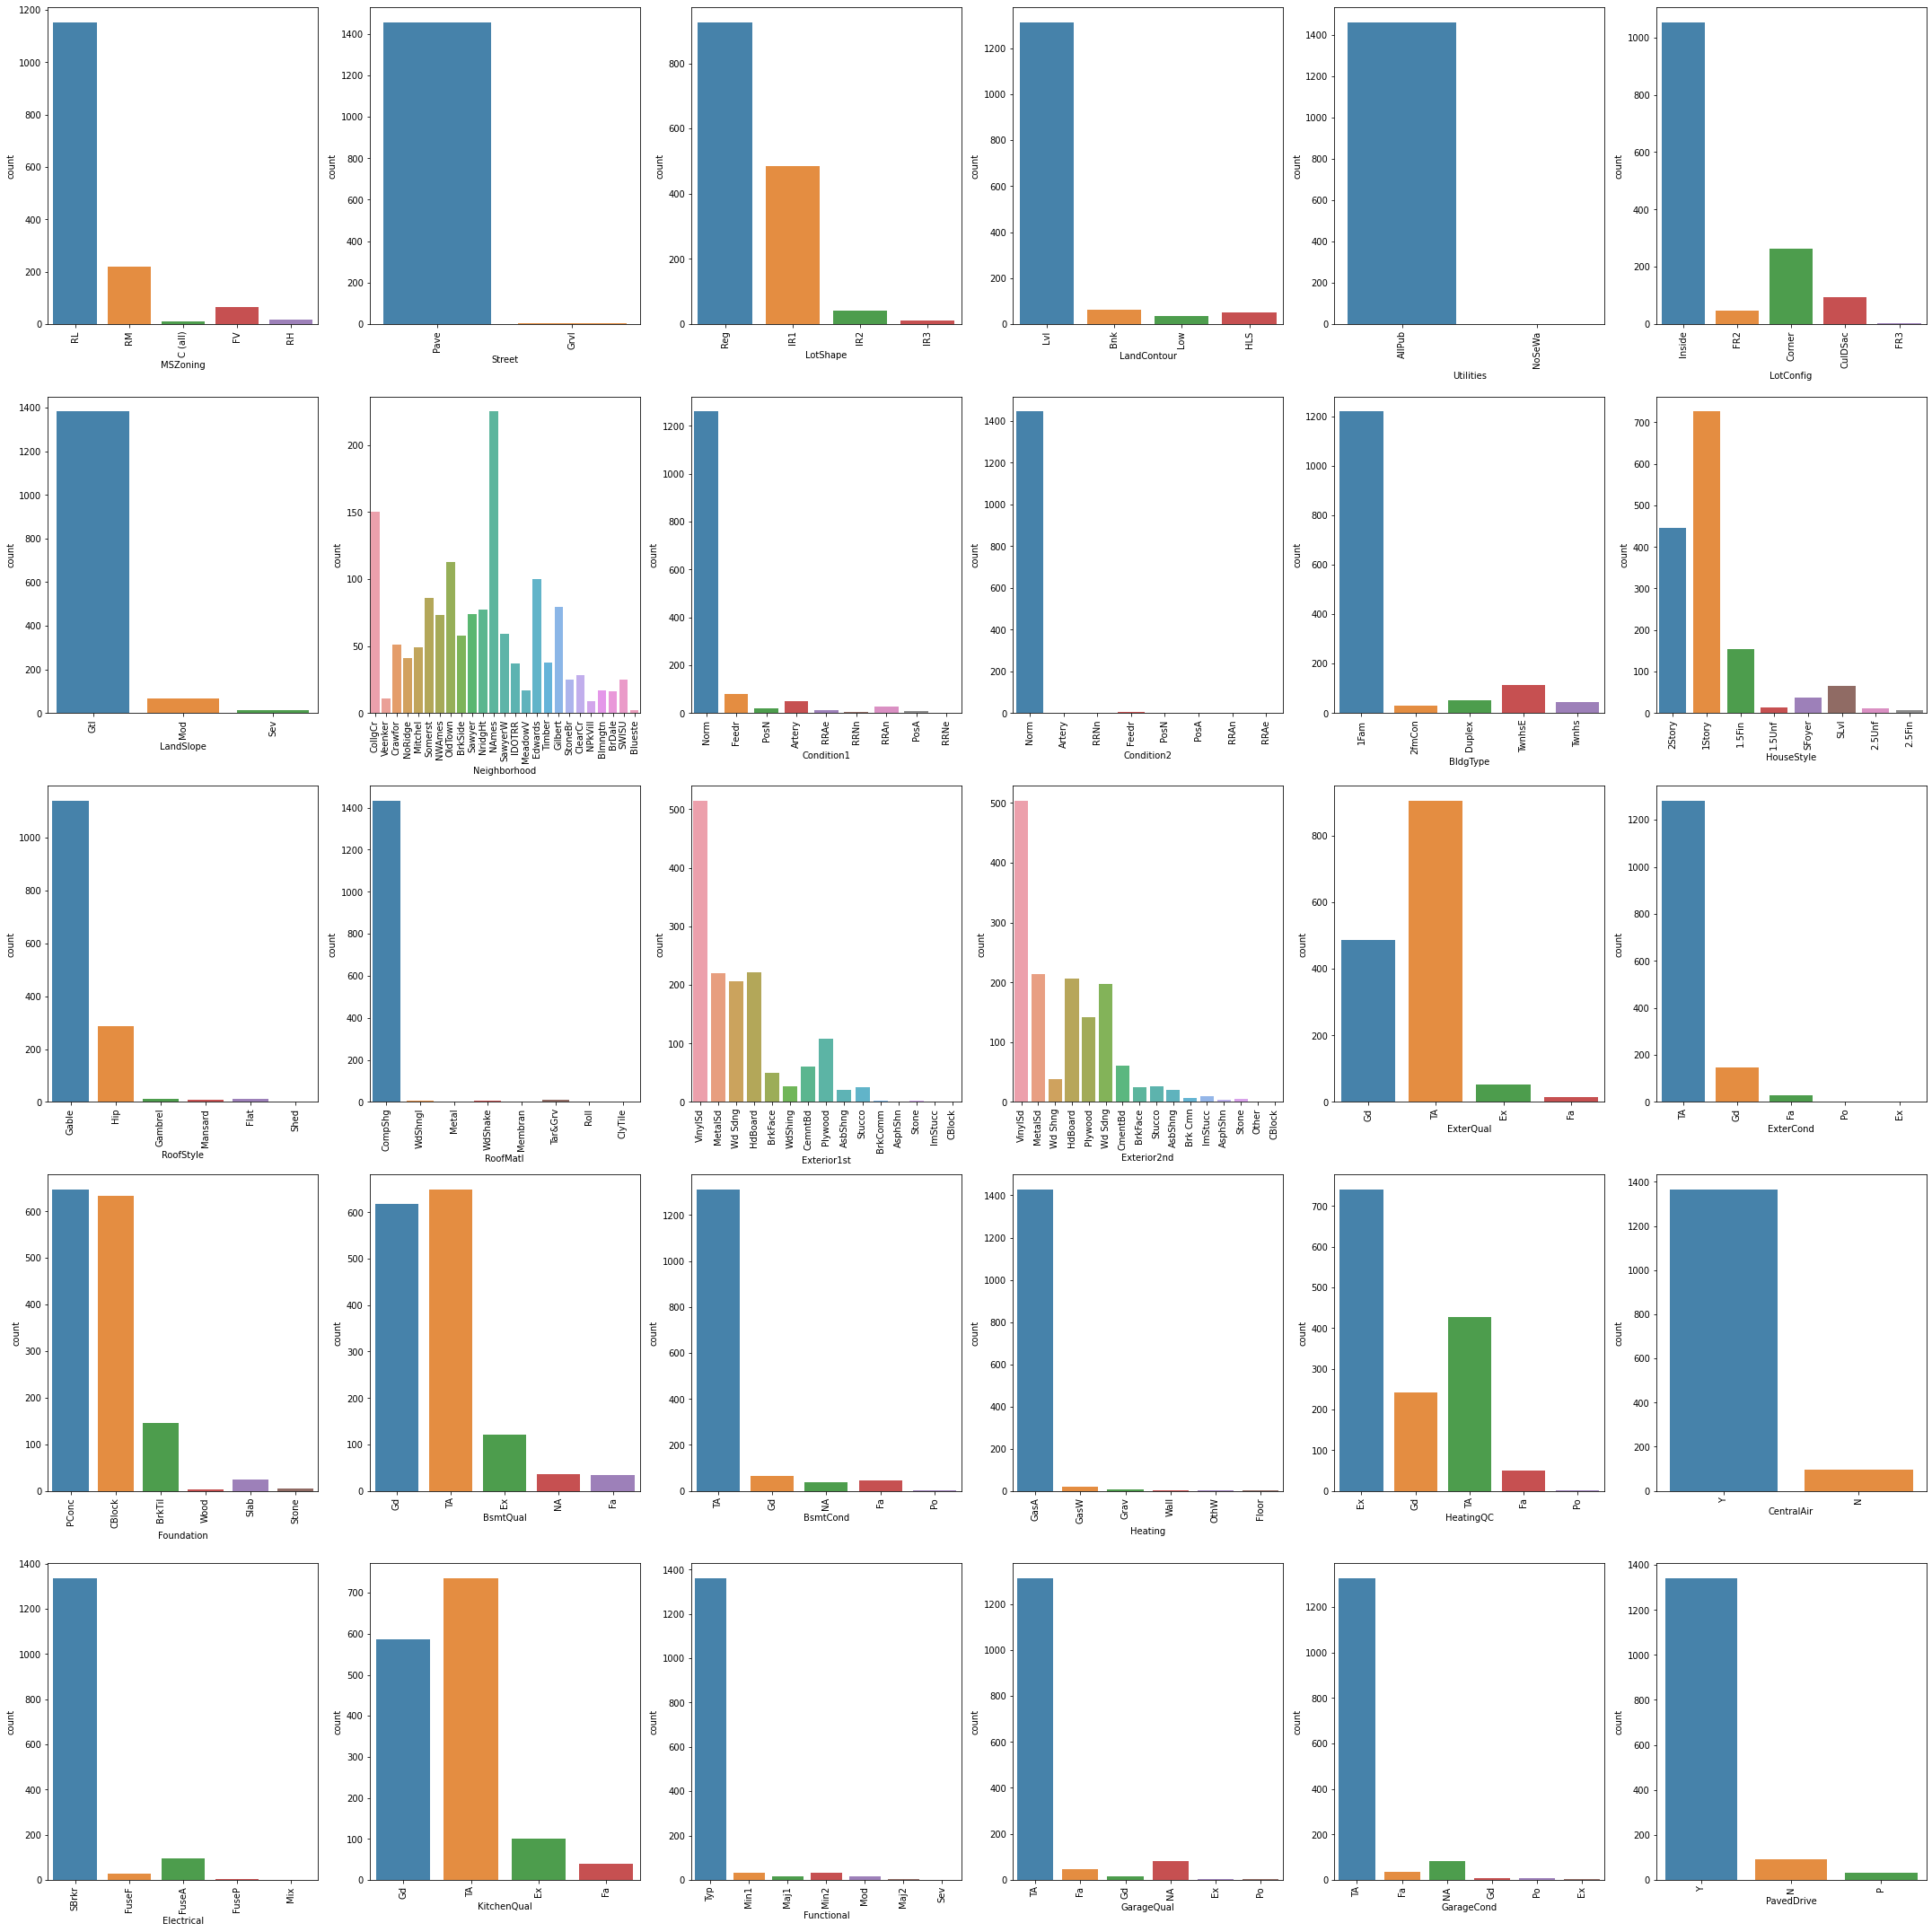

In [24]:
fig, axes = plt.subplots(round(len(categorical) / 6), 6, figsize=(30, 30))
for i, ax in enumerate(fig.axes):
    if i < len(categorical):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x = categorical[i], alpha=0.9, data = dataset, ax = ax)

fig.tight_layout()

Following observations can be made from visually analyzing the data:

* Most houses (78.8%) have RL Residential Low Density zoning classification
* Most streets (99.6%) are Paved, most lots are in regular shape
* Most properties (89.9%) have Near Flat/Level land contour
Conditions 1 and 2(Proximity to various conditions) are Norm(normal) for most properties (90%)
* Quality(ExterQual, BsmtQual, HeatingQC etc) and Condition(GarageCond etc) variables are TA(Typical/Average) for most of the properties.
* Only one property doesn't have All Public Utilities
Majority of houses (98.2%) have Standard (Composite) Shingle as roof material

## Histograms for each numerical variables

**Histograms helps in understanding the distribution and dispersion of numerical data**

In [ ]:
fig = pd.melt(dataset, value_vars = numericals)
grid = sns.FacetGrid(fig, col = 'variable', col_wrap = 6, sharex = False, sharey = False)
grid = grid.map(sns.histplot, "value")

**Exploratory Data Analysis to understand how the categorical variables in our dataset relate to the sale price of the house.**

Using seaborn’s boxplot (box-and-whisker plot)

In [ ]:
fig, ax = plt.subplots(6, 4, figsize=(30, 30))
plt.subplots_adjust(wspace=0.9, hspace=0.9)
fig.tight_layout()
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=dataset, ax=subplot)

* Excellent Quality(ExterQual, BsmtQual, HeatingQC etc) and Condition(GarageCond etc) variables implies an increase in SalePrice
* Also Neighbourhoods affect the SalePrice of the house (should analyse them closely)
* Roof material, Roof style has a good influence on SalesPrice
* Houses with paved street, Floating Village Residential zoning, Central air conditioning have higher price

### Analyzing neighbourhoods and SalePrice

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sorted_nb = dataset.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
plt.xticks(rotation=45, ha='right')
sns.boxplot(x = dataset['Neighborhood'], y = dataset['SalePrice'], order = list(sorted_nb.index))

Neighbourhoods such as NridgHt, NoRidge, StoneBr are expensive
There is wide dispersion of median Sale Prices in some neighbourhoods like StoneBr, NridgHt, veenker, SawyerW